# Functional API 
---
기초부분

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Input에는 항상 dtype이 포함되어 있어야합니다.

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
inputs.dtype

tf.float32

레이어를 호출하여 새노드는 생성 후, 노드간 화살표를 그리듯이 전달 한 출력을 얻음

In [5]:
dense = Dense(64, activation="relu")
x = dense(inputs)

레이어에 직접 지정해서 호출할 수도 있음

In [6]:
x = Dense(64, activation="relu")(x)
outputs = Dense(10)(x)

이 시점에서 레이어 그래프에서 입력과 출력을 지정하여 Model을 만들 수 있습니다.

In [7]:
model = keras.Model(inputs=inputs, outputs=outputs, name = "mnist_model")

In [8]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


keras 유틸을 이용하여 모델을 플로팅하는 것도 가능합니다.

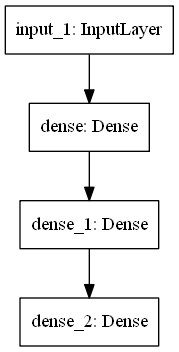

In [9]:
keras.utils.plot_model(model, "./img/my_first_model.png")

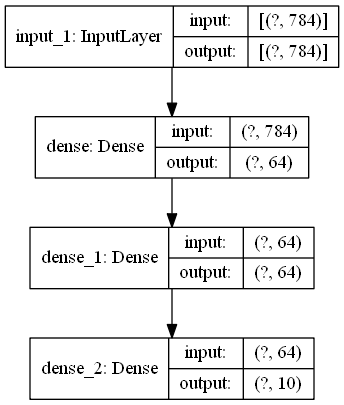

In [10]:
keras.utils.plot_model(model, "./img/my_first_model_with_info.png", show_shapes=True)

그림의 연결 화살표는 코드의 호출 작업으로 대체됩니다.

"계층 그래프"는 딥러닝 모델에 대한 직관적인 정신이미지이며 Functional API는 이를 밀접하게 반영하는 모델을 만드는 방법입니다.

# 동일한 레이어 그래프를 사용하여 여러 모델 정의
---

Functional API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성됩니다.

단일 레이어 그래프를 사용하여 여러 모델을 생성할 수 있습니다.

In [11]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = Conv2D(16, 3, activation="relu")(encoder_input)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(3)(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
encoder_output = GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = Reshape((4, 4, 1))(encoder_output)
x = Conv2DTranspose(16, 3, activation="relu")(x)
x = Conv2DTranspose(32, 3, activation="relu")(x)
x = UpSampling2D(3)(x)
x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

# 모든 모델은 레이어처럼 호출 가능합니다.
---

Input 혹은 다른 레이어의 출력에서 모델을 호출하는 것으로 모든 모델을 레이어 인 것 처럼 처리할 수 있습니다.

모델을 호출하면 모델의 아키텍처를 재사용하는 것이 아니라 Weights도 재사용하게 됩니다.

In [12]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = Conv2D(16, 3, activation="relu")(encoder_input)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(3)(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
encoder_output = GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = Reshape((4, 4, 1))(decoder_input)
x = Conv2DTranspose(16, 3, activation="relu")(x)
x = Conv2DTranspose(32, 3, activation="relu")(x)
x = UpSampling2D(3)(x)
x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

## 앙상블로 응용

In [13]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_5[0][0]                    
____________________________________________________________________________________________

# 복잡한 그래프 토폴로지 조작
---

여러 입력 및 출력이 있는 모델은 Sequential API로 처리할 수 없습니다.

In [15]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

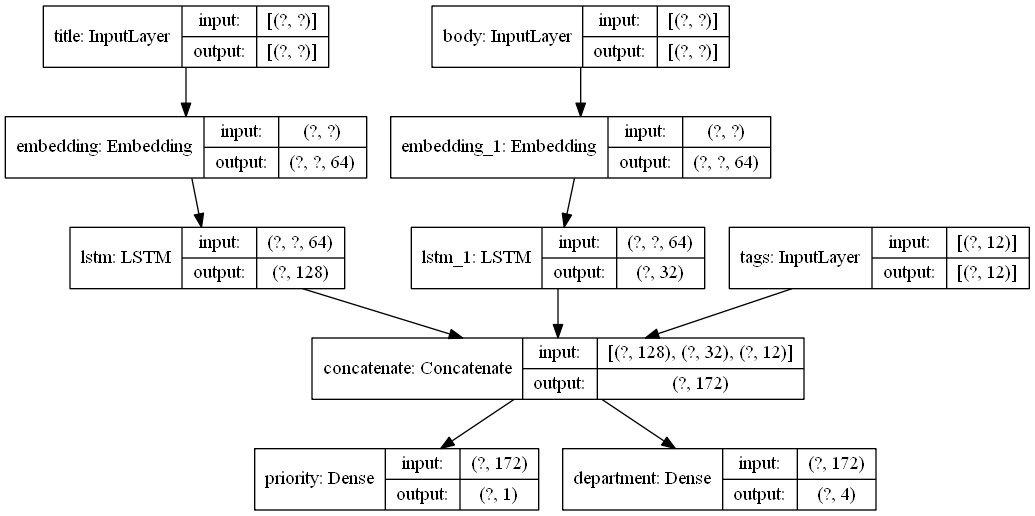

In [16]:
keras.utils.plot_model(model, "./img/multi_input_and_output_model.png", show_shapes=True)

출력 마다 로스를 다르게 할당하는 것도 가능합니다.

이름이 있다면 이름으로 직접 지정이 가능합니다.

In [17]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights=[1.0, 0.2],
)

## Toy ResNet

In [18]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = Conv2D(32, 3, activation="relu")(inputs)
x = Conv2D(64, 3, activation="relu")(x)
block_1_output = MaxPooling2D(3)(x)

x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = add([x, block_2_output])

x = Conv2D(64, 3, activation="relu")(block_3_output)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_9[0][0]                   
_________________________________________________________________________________________

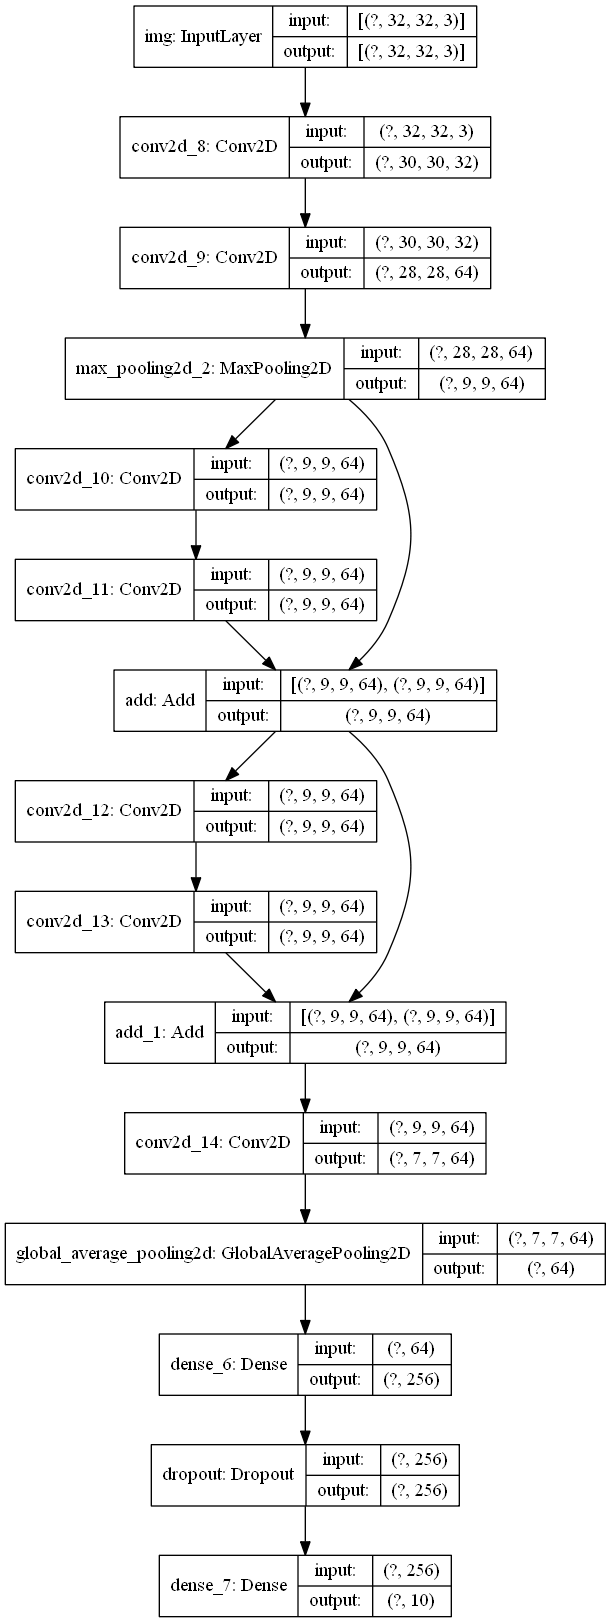

In [19]:
keras.utils.plot_model(model, "./img/mini_resnet.png", show_shapes=True)

# 공유 레이어
---

레이어 공유가 필요할 때도 Functional API가 좋습니다.

In [20]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

# 레이어 그래프에서 노드 추출 및 재사용
---

Functional API는 정적 데이터 구조이므로 Access하고 검사할 수 있습니다.

따라서, 중간 레이어에 액세스하여 다른 곳에서 재사용 할 수 있음을 의미합니다.

이는 특징 추출과 같은 작업에 매우 유용합니다.

In [21]:
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 157s 0us/step


In [22]:
features_list = [layer.output for layer in vgg19.layers]

In [23]:
features_list

[<tf.Tensor 'input_8:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1/Identity:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Identity:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/Identity:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Identity:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Identity:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/Identity:0' shape=(None, 56, 56, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Identity:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2/Identity:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv3/Identity:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv4/Identity:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_pool/Identity:0' shape=(None, 28, 28, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Identity:0' shape=(None,

# Functional API vs SubClassing
---

Functional API는 더 Hight Level이고, 더 쉽고 안전하며, 여러 기능들을 지원합니다.

SubClassing을 할 경우는 빌드할 때 더 큰 유연성을 제공합니다. 예를 들어 Functional API로 Tree-RNN을 구현할 수 없으며, 직접 SubClassing 해야 합니다.

In [24]:
class MLP(keras.Model):
    
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.dense_1 = Dense(64, activation='relu')
        self.dense_2 = Dense(10)
        self.dense_3 = Dense(10)
        self.dense_4 = Dense(10)
    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.dense_4(x)

# Instantiate the model.
mlp = MLP()

In [25]:
mlp.build(input_shape=(4,1))

In [26]:
mlp.summary()

Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  128       
_________________________________________________________________
dense_9 (Dense)              multiple                  650       
_________________________________________________________________
dense_10 (Dense)             multiple                  110       
_________________________________________________________________
dense_11 (Dense)             multiple                  110       
Total params: 998
Trainable params: 998
Non-trainable params: 0
_________________________________________________________________


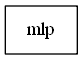

In [27]:
keras.utils.plot_model(mlp, "./img/mlp.png", show_shapes=True)